# Basic examples of usage of GeoImage, GeoImageTilers

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [29]:
import os 

import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from GeoImage import GeoImage
from GeoImageTilers import GeoImageTiler, GeoImageTilerConstSize
from create_synthetic_images import create

In [10]:
def display(img, **kwargs):
    plt.imshow(img[:,:,:3], interpolation='none', **kwargs)
    plt.colorbar(orientation='horizontal')

## GeoImage examples

### Open image with GeoImage and print basic information

- Image shape
- geo projection string 
- geographic extent in WGS84
- metadata
- some other functions from gdal dataset

In [11]:
gimg = GeoImage('dog.jpg')

gimg.shape, gimg.projection, gimg.geo_extent, gimg.metadata, gimg.get_dataset().GetDescription(), gimg.get_dataset().GetGeoTransform()

((576, 768, 3),
 '',
 None,
 {'BAND_1__IMAGE_STRUCTURE__COMPRESSION': 'JPEG',
  'BAND_2__IMAGE_STRUCTURE__COMPRESSION': 'JPEG',
  'BAND_3__IMAGE_STRUCTURE__COMPRESSION': 'JPEG',
  'COLOR_PROFILE__SOURCE_ICC_PROFILE': 'AAAMSExpbm8CEAAAbW50clJHQiBYWVogB84AAgAJAAYAMQAAYWNzcE1TRlQAAAAASUVDIHNSR0IAAAAAAAAAAAAAAAAAAPbWAAEAAAAA0y1IUCAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARY3BydAAAAVAAAAAzZGVzYwAAAYQAAABsd3RwdAAAAfAAAAAUYmtwdAAAAgQAAAAUclhZWgAAAhgAAAAUZ1hZWgAAAiwAAAAUYlhZWgAAAkAAAAAUZG1uZAAAAlQAAABwZG1kZAAAAsQAAACIdnVlZAAAA0wAAACGdmlldwAAA9QAAAAkbHVtaQAAA/gAAAAUbWVhcwAABAwAAAAkdGVjaAAABDAAAAAMclRSQwAABDwAAAgMZ1RSQwAABDwAAAgMYlRSQwAABDwAAAgMdGV4dAAAAABDb3B5cmlnaHQgKGMpIDE5OTggSGV3bGV0dC1QYWNrYXJkIENvbXBhbnkAAGRlc2MAAAAAAAAAEnNSR0IgSUVDNjE5NjYtMi4xAAAAAAAAAAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAADzUQABAAAAARbMWFlaIAAAAAAAAAAAAAAAAAAAAABYWVogAAAAAAAAb6IAADj1AAADkFhZWiAAAAAAAABimQAAt4UAABjaWFlaIAAAAAAAAC

### Get image data
- Whole image
- Part of the image without rescaling
- Part of the image with rescaling

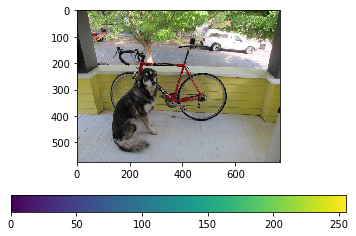

In [5]:
np_img = gimg.get_data(dtype=np.uint8)
np_img.dtype, np_img.shape
display(np_img)

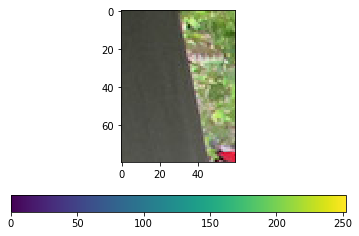

In [6]:
display(gimg.get_data([10, 15, 60, 80], dtype=np.uint8))

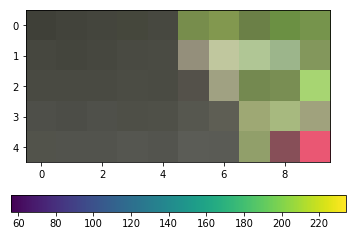

In [7]:
display(gimg.get_data([10, 15, 60, 80], dst_width=10, dst_height=5, dtype=np.uint8))

## GeoImageTilers examples

### GeoImageTiler : iterator over tiles of GeoImage

1. Add `nodata` values, constant tile size and overlapping

(256L, 256L, 3L) uint8 0 255 -15 -15
(256L, 256L, 3L) uint8 0 255 226 -15
(256L, 256L, 3L) uint8 0 255 467 -15
(256L, 256L, 3L) uint8 0 255 708 -15
(256L, 256L, 3L) uint8 0 222 -15 226
(256L, 256L, 3L) uint8 0 231 226 226
(256L, 256L, 3L) uint8 0 241 467 226
(256L, 256L, 3L) uint8 0 241 708 226
(256L, 256L, 3L) uint8 0 201 -15 467
(256L, 256L, 3L) uint8 0 195 226 467
(256L, 256L, 3L) uint8 0 194 467 467
(256L, 256L, 3L) uint8 0 156 708 467


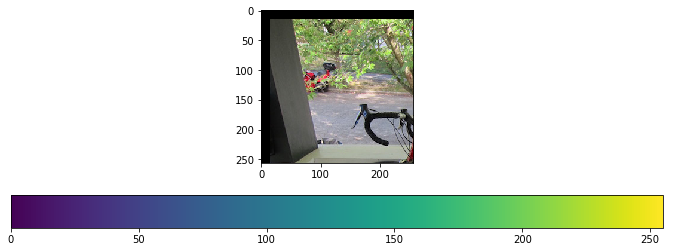

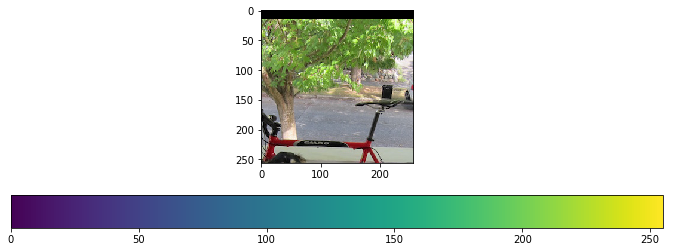

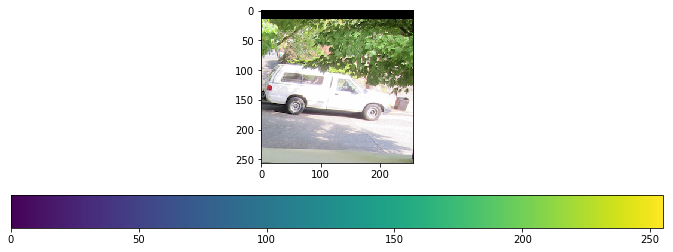

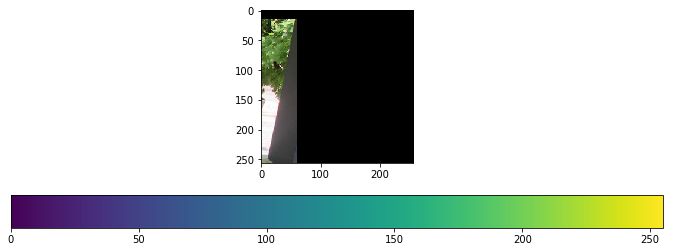

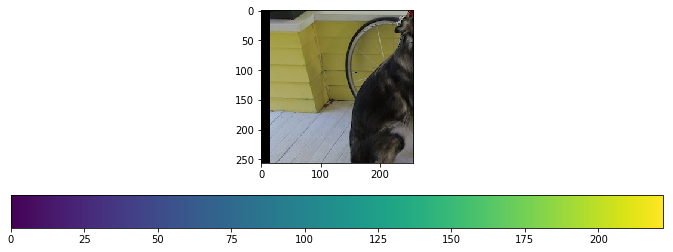

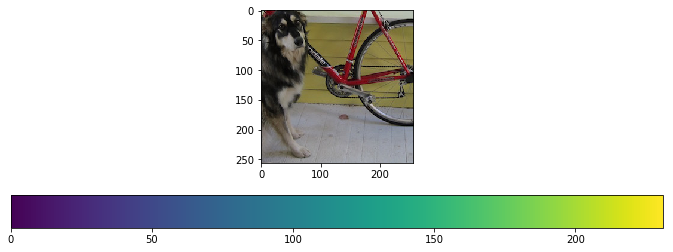

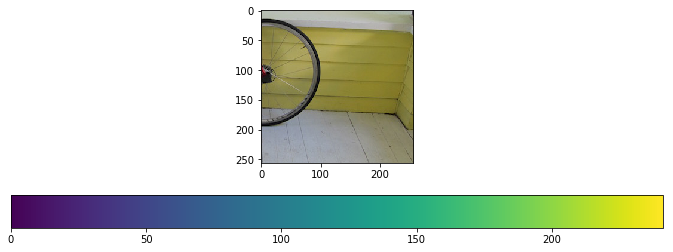

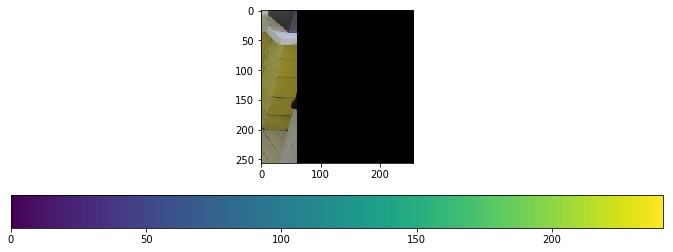

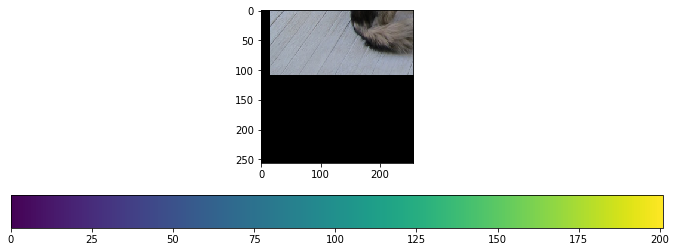

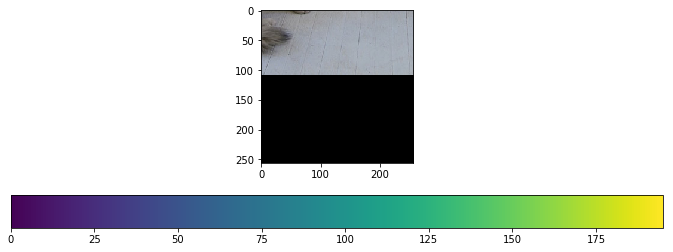

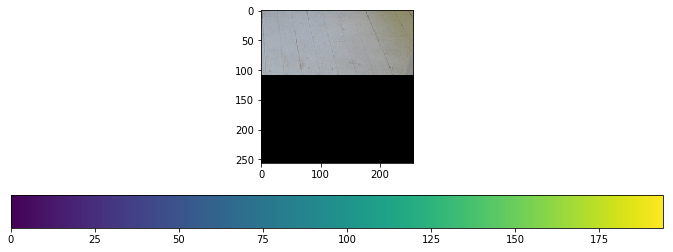

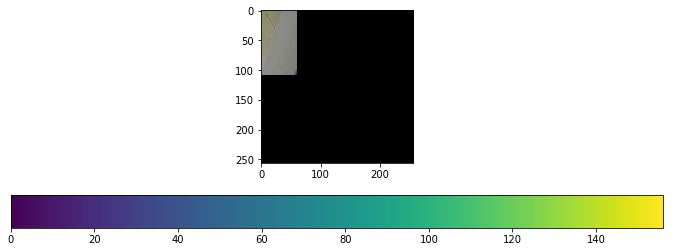

In [12]:
tiles = GeoImageTiler(gimg, tile_size=(256, 256), overlapping=15, include_nodata=True, nodata_value=0)

for tile, xoffset, yoffset in tiles:
    print tile.shape, tile.dtype, tile.min(), tile.max(), xoffset, yoffset
    plt.figure(figsize=(12,4))
    display(tile.astype(np.uint8))

(241L, 241L, 3L) float64 0.0 255.0 0 0
(241L, 256L, 3L) float64 0.0 255.0 226 0
(241L, 256L, 3L) float64 0.0 255.0 467 0
(241L, 60L, 3L) float64 0.0 255.0 708 0
(256L, 241L, 3L) float64 0.0 222.0 0 226
(256L, 256L, 3L) float64 0.0 231.0 226 226
(256L, 256L, 3L) float64 0.0 241.0 467 226
(256L, 60L, 3L) float64 0.0 241.0 708 226
(109L, 241L, 3L) float64 0.0 201.0 0 467
(109L, 256L, 3L) float64 29.0 195.0 226 467
(109L, 256L, 3L) float64 65.0 194.0 467 467
(109L, 60L, 3L) float64 33.0 156.0 708 467


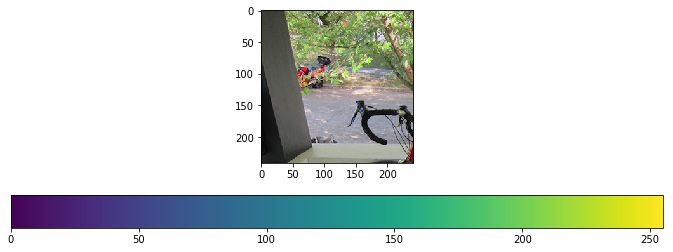

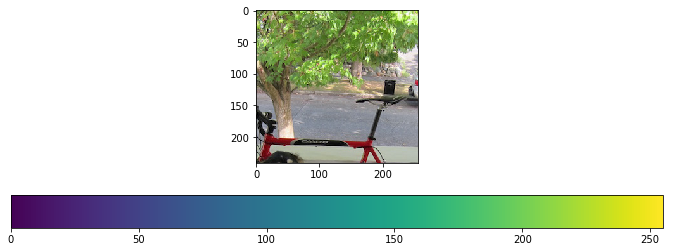

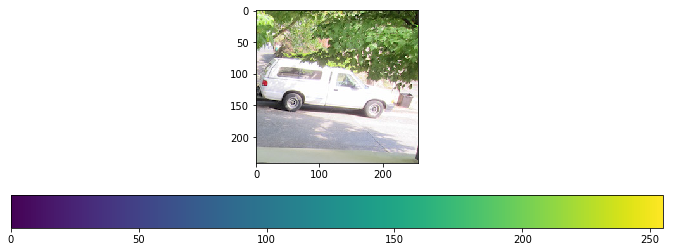

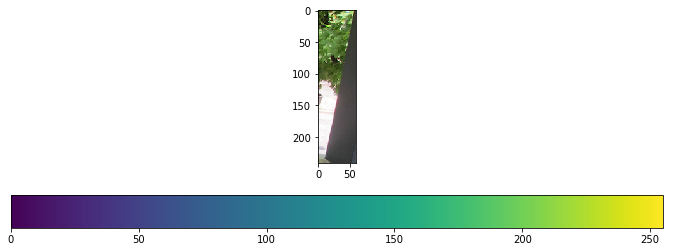

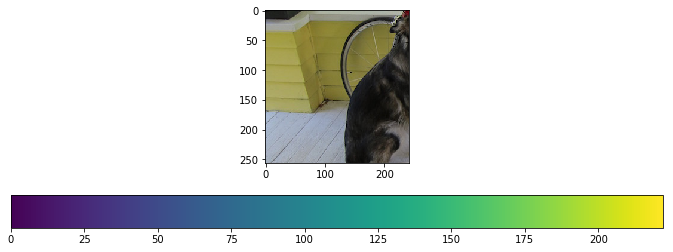

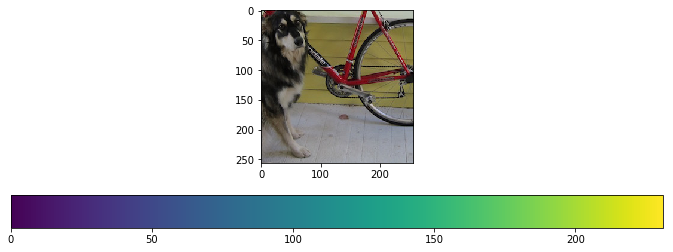

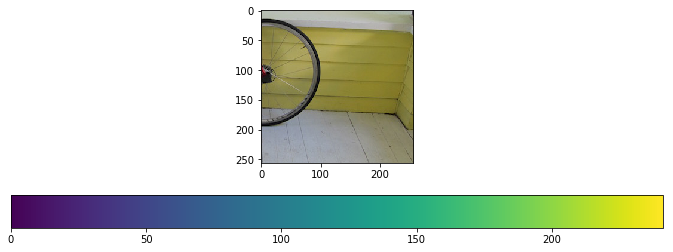

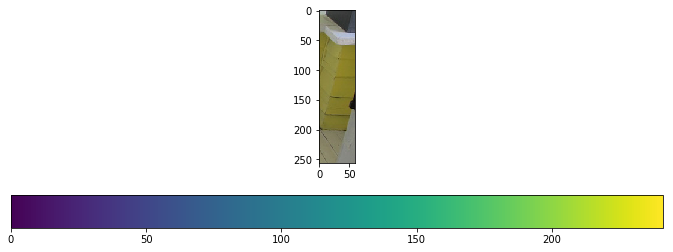

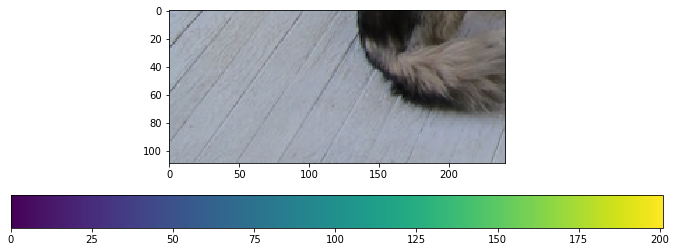

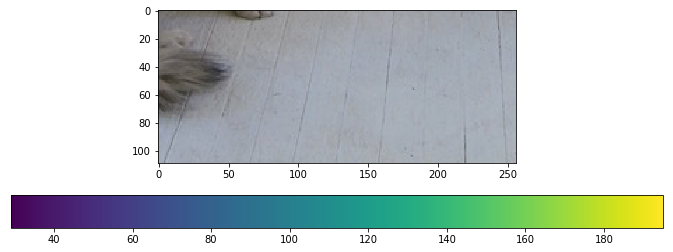

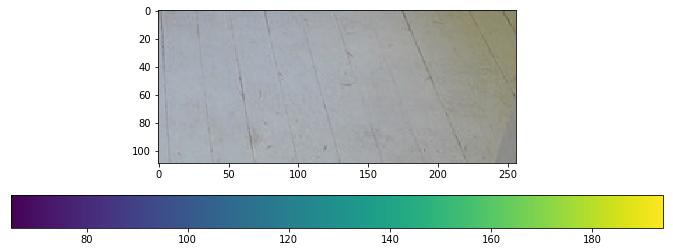

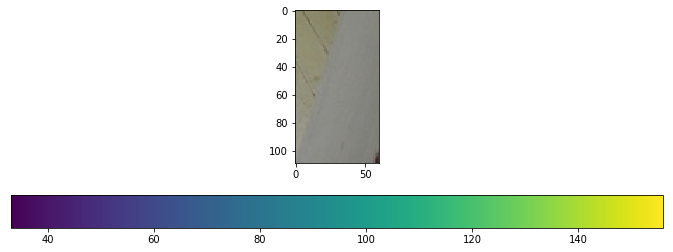

In [13]:
tiles = GeoImageTiler(gimg, tile_size=(256, 256), overlapping=15, include_nodata=False, nodata_value=-1.0)
for tile, xoffset, yoffset in tiles:
    print tile.shape, tile.dtype, tile.min(), tile.max(), xoffset, yoffset
    plt.figure(figsize=(12,4))
    display(tile.astype(np.uint8))

0/4 = (0,0) | extent=[0, 0, 512, 512]
dst_width=256, dst_height=256
data.shape=(256L, 256L, 3L), 0,0
(256L, 256L, 3L) 0 0
1/4 = (1,0) | extent=[512, 0, 256, 512]
dst_width=128, dst_height=256
data.shape=(256L, 128L, 3L), 256,0
(256L, 128L, 3L) 512 0
2/4 = (0,1) | extent=[0, 512, 512, 64]
dst_width=256, dst_height=32
data.shape=(32L, 256L, 3L), 0,256
(32L, 256L, 3L) 0 512
3/4 = (1,1) | extent=[512, 512, 256, 64]
dst_width=128, dst_height=32
data.shape=(32L, 128L, 3L), 256,256
(32L, 128L, 3L) 512 512


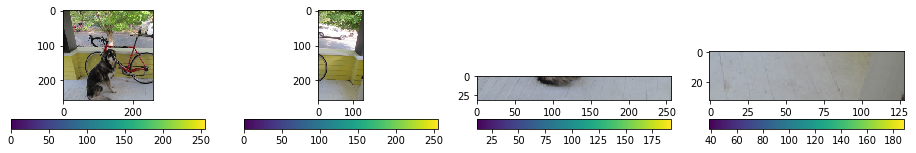

In [132]:
tiles = GeoImageTiler(gimg, tile_size=(256, 256), overlapping=0, include_nodata=False, scale=2, nodata_value=0.0)
plt.figure(figsize=(16,8))
c = 1
for tile, xoffset, yoffset in tiles:
    print tile.shape, xoffset, yoffset
    plt.subplot(3,4,c); c+=1
    display(tile.astype(np.uint8))

0/9 = (0,0) | extent=[0, 0, 256, 256]
dst_width=256, dst_height=256
data.shape=(256L, 256L, 3L), 0,0
(256L, 256L, 3L) 0 0
1/9 = (1,0) | extent=[256, 0, 256, 256]
dst_width=256, dst_height=256
data.shape=(256L, 256L, 3L), 256,0
(256L, 256L, 3L) 256 0
2/9 = (2,0) | extent=[512, 0, 256, 256]
dst_width=256, dst_height=256
data.shape=(256L, 256L, 3L), 512,0
(256L, 256L, 3L) 512 0
3/9 = (0,1) | extent=[0, 160, 256, 256]
dst_width=256, dst_height=256
data.shape=(256L, 256L, 3L), 0,160
(256L, 256L, 3L) 0 160
4/9 = (1,1) | extent=[256, 160, 256, 256]
dst_width=256, dst_height=256
data.shape=(256L, 256L, 3L), 256,160
(256L, 256L, 3L) 256 160
5/9 = (2,1) | extent=[512, 160, 256, 256]
dst_width=256, dst_height=256
data.shape=(256L, 256L, 3L), 512,160
(256L, 256L, 3L) 512 160
6/9 = (0,2) | extent=[0, 320, 256, 256]
dst_width=256, dst_height=256
data.shape=(256L, 256L, 3L), 0,320
(256L, 256L, 3L) 0 320
7/9 = (1,2) | extent=[256, 320, 256, 256]
dst_width=256, dst_height=256
data.shape=(256L, 256L, 3L

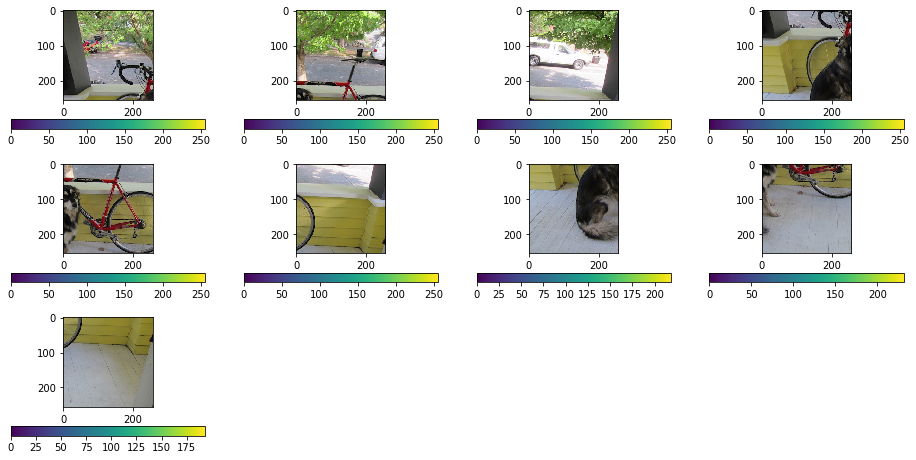

In [136]:
tiles = GeoImageTilerConstSize(gimg, tile_size=(256, 256), min_overlapping=0)
plt.figure(figsize=(16,8))
c = 1
for tile, xoffset, yoffset in tiles:
    print tile.shape, xoffset, yoffset
    plt.subplot(3,4,c); c+=1
    display(tile.astype(np.uint8))

0/4 = (0,0) | extent=[0, 0, 384, 384]
dst_width=256, dst_height=256
data.shape=(256L, 256L, 3L), 0,0
(256L, 256L, 3L) 0 0
1/4 = (1,0) | extent=[384, 0, 384, 384]
dst_width=256, dst_height=256
data.shape=(256L, 256L, 3L), 256,0
(256L, 256L, 3L) 384 0
2/4 = (0,1) | extent=[0, 192, 384, 384]
dst_width=256, dst_height=256
data.shape=(256L, 256L, 3L), 0,128
(256L, 256L, 3L) 0 192
3/4 = (1,1) | extent=[384, 192, 384, 384]
dst_width=256, dst_height=256
data.shape=(256L, 256L, 3L), 256,128
(256L, 256L, 3L) 384 192


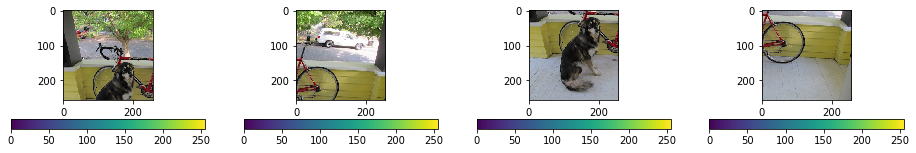

In [138]:
tiles = GeoImageTilerConstSize(gimg, tile_size=(256, 256), min_overlapping=0, scale=1.5)
plt.figure(figsize=(16,8))
c = 1
for tile, xoffset, yoffset in tiles:
    print tile.shape, xoffset, yoffset
    plt.subplot(3,4,c); c+=1
    display(tile.astype(np.uint8))

tiled_image.shape: (466, 621, 3)
x * 1.0 / scale :  0.0
y * 1.0 / scale :  0.0
x * 1.0 / scale :  128.0
y * 1.0 / scale :  0.0
x * 1.0 / scale :  256.0
y * 1.0 / scale :  0.0
x * 1.0 / scale :  384.0
y * 1.0 / scale :  0.0
x * 1.0 / scale :  512.0
y * 1.0 / scale :  0.0
x * 1.0 / scale :  0.0
y * 1.0 / scale :  128.0
x * 1.0 / scale :  128.0
y * 1.0 / scale :  128.0
x * 1.0 / scale :  256.0
y * 1.0 / scale :  128.0
x * 1.0 / scale :  384.0
y * 1.0 / scale :  128.0
x * 1.0 / scale :  512.0
y * 1.0 / scale :  128.0
x * 1.0 / scale :  0.0
y * 1.0 / scale :  256.0
x * 1.0 / scale :  128.0
y * 1.0 / scale :  256.0
x * 1.0 / scale :  256.0
y * 1.0 / scale :  256.0
x * 1.0 / scale :  384.0
y * 1.0 / scale :  256.0
x * 1.0 / scale :  512.0
y * 1.0 / scale :  256.0
x * 1.0 / scale :  0.0
y * 1.0 / scale :  384.0
x * 1.0 / scale :  128.0
y * 1.0 / scale :  384.0
x * 1.0 / scale :  256.0
y * 1.0 / scale :  384.0
x * 1.0 / scale :  384.0
y * 1.0 / scale :  384.0
x * 1.0 / scale :  512.0
y * 1.0 / 

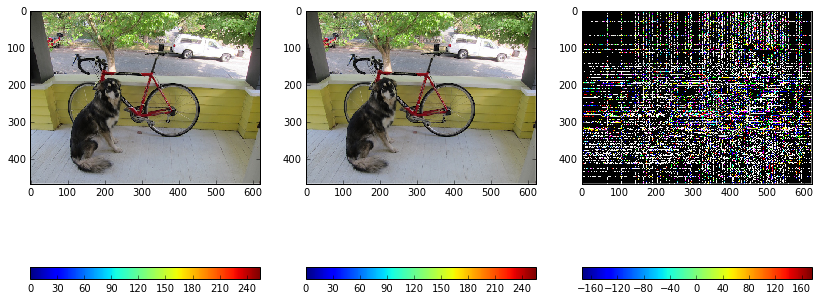

In [73]:
tile_size = (128, 128)
overlapping = 0
scale = 1.238

def _f(_x):
    return int(np.ceil(_x))

def _f2(_x):
    return int(np.floor(_x))


# Total tiled image is smaller if scale > 1
h, w, nc = gimg.shape
h = _f(h * 1.0 / scale)
w = _f(w * 1.0 / scale)
tiled_image = np.zeros((h, w, nc))
print "tiled_image.shape:", tiled_image.shape
tiles = GeoImageTiler(gimg, tile_size=tile_size,
                      overlapping=overlapping,
                      include_nodata=False, scale=scale)
for tile, x, y in tiles:
    # Offset is given for the original image
    print "x * 1.0 / scale : ", x * 1.0 / scale
    print "y * 1.0 / scale : ", y * 1.0 / scale
    x = _f2(x * 1.0 / scale)
    y = _f2(y * 1.0 / scale)
    xend = min(x+tile_size[0], w)
    yend = min(y+tile_size[1], h)
    if tile.shape[:2] != (yend-y, xend-x):
        print x,xend, y,yend, tile.shape, (yend-y, xend-x)

    tiled_image[y:yend, x:xend, :] = tile

scaled_img = gimg.get_data(dst_height=h, dst_width=w)

fig = plt.figure(figsize=(14,10))
fig.add_subplot(131)
display(scaled_img.astype(np.uint8))
fig.add_subplot(132)
display(tiled_image.astype(np.uint8))
fig.add_subplot(133)
display(scaled_img - tiled_image)
err = float(np.sum(tiled_image - scaled_img))
print err
# logging.debug("Err : %f" % err)
# self.assertTrue(np.abs(err) < 1e-10)

In [16]:
tiled_image.shape, tiled_image.min(), tiled_image.max()

((80, 67, 5), 0.0, 254.0)

In [17]:
scaled_img.shape, scaled_img.min(), scaled_img.max()

((80, 67, 5), 0, 254)

In [139]:
def _f(_x):
    return int(np.ceil(_x))

import os 
import logging
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from GeoImage import GeoImage
from GeoImageTilers import GeoImageTiler, GeoImageTilerConstSize
from create_synthetic_images import create

In [120]:
_ = create(15, 19, 1, 'test_image.tif', depth=1)

In [121]:
from GeoImage import from_ndarray

In [140]:
gimg2 = GeoImage('test_image.tif')
data = gimg2.get_data()
h, w, nc = gimg2.shape
scale = 3
h2 = _f(h * 1.0 / scale)
w2 = _f(w * 1.0 / scale)
data2 = gimg2.get_data(dst_height=h2, dst_width=w2)
print data[:,:,0]
print data2[:,:,0], h2, w2, h, w 

[[ 77  40 231 138  51  71  55 208 186 220  11 111 218 212  18]
 [252 254  26  10  27  77 226 113  21 167 161  77 168   4 178]
 [227 143 186  48 127  71  66  70 129  60  92  41  85 240 139]
 [199 179  48 131 211 204  49 213   6 120  99  22 205 204 196]
 [ 39  77 219  52  67 158  69 200  25   0  22   0 187 190   5]
 [  2  60 193  36 140 201 193 232  59  94  47 142  99  68   0]
 [158  58 238 123 220  54 106 235 201   2 181 151 183 126 122]
 [ 46  84  73  68 172 110  76  49 172 194   2 232  95  23 145]
 [236  97 120 139  99 253  27  29 225 249 162 113 129  80   9]
 [103 176 138   6 133 177 135 127  61 137 117 180 199 132  50]
 [130 143  89 206 205  76  96 210  57  42 237  78 118 225 151]
 [ 73 131 214  33 192  22  30 230 180  45  93   1 107  16   1]
 [ 41 141  39 239 180 139  33  87  72 243 137  77 171 192 111]
 [ 49 147  11  38  46  92  49 239 179 217 182 151  36 237  60]
 [ 11  49 122  89 121  23 105  93  18  88 179 249  75 151 145]
 [229  39  13  72  11  97 122 218 202 114  47 159 148 1

In [123]:
gimg3 = from_ndarray(data2)

In [130]:
logging.getLogger().setLevel(logging.DEBUG)

#tiles = GeoImageTiler(gimg2, tile_size=(3,3), overlapping=0, scale=scale)
#tiles2 = GeoImageTiler(gimg3, tile_size=(3,3), overlapping=0)
tiles = GeoImageTilerConstSize(gimg2, tile_size=(3,3), min_overlapping=0, scale=scale)
tiles2 = GeoImageTilerConstSize(gimg3, tile_size=(3,3), min_overlapping=0)

err = 0.0
for tile, x, y in tiles:
    tile2, x2, y2 = tiles2.next()
    print "\n"
    e = np.sum(np.abs(tile - tile2))
    if e > 0:
        print "\n--"
        print tile[:,:,0], x, y
        print tile2[:,:,0], x2, y2
        print e
        break

    err += e
#print err

0/35 = (0,0) | extent=[0, 0, 3, 3]
dst_width=3, dst_height=3
data.shape=(3L, 3L, 1L), 0,0
0/6 = (0,0) | extent=[0, 0, 3, 3]
dst_width=3, dst_height=3
data.shape=(3L, 3L, 1L), 0,0



--
[[ 77  40 231]
 [252 254  26]
 [227 143 186]] 0 0
[[254  27 113]
 [ 77  67 200]
 [ 58 220 235]] 0 0
1209


In [ ]:
0/4 = (0,0) | extent=[0, 0, 9, 9]
dst_width=3, dst_height=3
data.shape=(3L, 3L, 1L), 0,0
0/4 = (0,0) | extent=[0, 0, 3, 3]
dst_width=3, dst_height=3
data.shape=(3L, 3L, 1L), 0,0


1/4 = (1,0) | extent=[9, 0, 6, 9]
dst_width=2, dst_height=3
data.shape=(3L, 2L, 1L), 3,0
1/4 = (1,0) | extent=[3, 0, 2, 3]
dst_width=2, dst_height=3
data.shape=(3L, 2L, 1L), 3,0


2/4 = (0,1) | extent=[0, 9, 9, 8]
dst_width=3, dst_height=3
data.shape=(3L, 3L, 1L), 0,3
2/4 = (0,1) | extent=[0, 3, 3, 3]
dst_width=3, dst_height=3
data.shape=(3L, 3L, 1L), 0,3



--
[[226 181 112]
 [ 79 194 155]
 [ 27  45 134]] 0 9
[[ 58  97  24]
 [ 37 237  86]
 [ 27  45 134]] 0 3

In [141]:
gimg2 = GeoImage('test_image.tif')
data = gimg2.get_data()
h, w, nc = gimg2.shape
scale = 2
print data[:,:,0]

[[ 77  40 231 138  51  71  55 208 186 220  11 111 218 212  18]
 [252 254  26  10  27  77 226 113  21 167 161  77 168   4 178]
 [227 143 186  48 127  71  66  70 129  60  92  41  85 240 139]
 [199 179  48 131 211 204  49 213   6 120  99  22 205 204 196]
 [ 39  77 219  52  67 158  69 200  25   0  22   0 187 190   5]
 [  2  60 193  36 140 201 193 232  59  94  47 142  99  68   0]
 [158  58 238 123 220  54 106 235 201   2 181 151 183 126 122]
 [ 46  84  73  68 172 110  76  49 172 194   2 232  95  23 145]
 [236  97 120 139  99 253  27  29 225 249 162 113 129  80   9]
 [103 176 138   6 133 177 135 127  61 137 117 180 199 132  50]
 [130 143  89 206 205  76  96 210  57  42 237  78 118 225 151]
 [ 73 131 214  33 192  22  30 230 180  45  93   1 107  16   1]
 [ 41 141  39 239 180 139  33  87  72 243 137  77 171 192 111]
 [ 49 147  11  38  46  92  49 239 179 217 182 151  36 237  60]
 [ 11  49 122  89 121  23 105  93  18  88 179 249  75 151 145]
 [229  39  13  72  11  97 122 218 202 114  47 159 148 1

In [159]:
shape=(12,13,1)
gimg3 = from_ndarray(np.arange(np.prod(shape), dtype=np.uint16).reshape(shape))
print gimg3.get_data()[:,:,0]

[[  0   1   2   3   4   5   6   7   8   9  10  11  12]
 [ 13  14  15  16  17  18  19  20  21  22  23  24  25]
 [ 26  27  28  29  30  31  32  33  34  35  36  37  38]
 [ 39  40  41  42  43  44  45  46  47  48  49  50  51]
 [ 52  53  54  55  56  57  58  59  60  61  62  63  64]
 [ 65  66  67  68  69  70  71  72  73  74  75  76  77]
 [ 78  79  80  81  82  83  84  85  86  87  88  89  90]
 [ 91  92  93  94  95  96  97  98  99 100 101 102 103]
 [104 105 106 107 108 109 110 111 112 113 114 115 116]
 [117 118 119 120 121 122 123 124 125 126 127 128 129]
 [130 131 132 133 134 135 136 137 138 139 140 141 142]
 [143 144 145 146 147 148 149 150 151 152 153 154 155]]


In [162]:
scale=2
tile_size=(3,3)
tiles = GeoImageTilerConstSize(gimg3, tile_size=(3,3), min_overlapping=0, scale=scale)
for tile, x, y in tiles:
    print "\n--"
    print x, y
    print tile[:,:,0]
    
    width = min(tile_size[0], gimg3.shape[1] - x)
    height = min(tile_size[1], gimg3.shape[0] - y)
    width_s = scale*width
    height_s = scale*height
    extent = [x, y, width_s, height_s]
    tile2 = gimg3.get_data(extent, dst_width=width, dst_height=height)
    
    print tile2[:,:,0]
    assert (tile == tile2).all()


--
0 0
[[14 16 18]
 [40 42 44]
 [66 68 70]]
[[14 16 18]
 [40 42 44]
 [66 68 70]]

--
4 0
[[18 20 22]
 [44 46 48]
 [70 72 74]]
[[18 20 22]
 [44 46 48]
 [70 72 74]]

--
8 0
[[21 23 25]
 [47 49 51]
 [73 75 77]]
[[21 23 25]
 [47 49 51]
 [73 75 77]]

--
0 6
[[ 92  94  96]
 [118 120 122]
 [144 146 148]]
[[ 92  94  96]
 [118 120 122]
 [144 146 148]]

--
4 6
[[ 96  98 100]
 [122 124 126]
 [148 150 152]]
[[ 96  98 100]
 [122 124 126]
 [148 150 152]]

--
8 6
[[ 99 101 103]
 [125 127 129]
 [151 153 155]]
[[ 99 101 103]
 [125 127 129]
 [151 153 155]]
